## <h1><center> Machine Learning </center></h1>

**Scenario: There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.**

## The contents:
### 1. Exploratory data analysis
### 2. Dealing with outliers
### 3. Dealing with missing values
### 4. Encoding categorical variables
### 5. Dealing with Imbalanced Classes
### 6. Correlation between variables
### 7. Scaling
### 8. ML Alghoritms
##### The Stratified K-Fold Cross-Validation
##### Features importances
##### The KNN Model
##### Random Forest Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/portuguese-bank-marketing-data-set/bank_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


# 1. Exploratory Data Analysis

In [4]:
# checking the data type and number of values, if we have any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [5]:
# renaming columns
df = df.rename(columns={'response_binary': 'target'})
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,target
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [6]:
df = df.drop(columns='response')

In [7]:
# identifying categorical and numerical variables
cat_var = df.select_dtypes(include=['object']).columns
num_var = df.select_dtypes(include=np.number)

<AxesSubplot:xlabel='target', ylabel='count'>

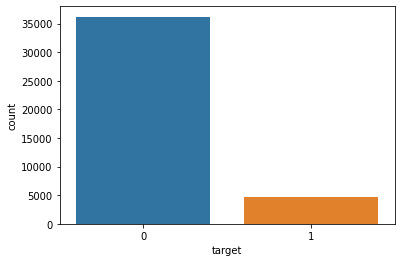

In [8]:
# checking number of values represented in each class
sns.countplot(data=df, x='target')

In [9]:
print('Percentage of NO and YES:\n', df['target'].value_counts()/len(df)*100)

Percentage of NO and YES:
 0    88.641316
1    11.358684
Name: target, dtype: float64


# 2. Dealing with outliers

In [10]:
num_var.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,target
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [11]:
# replacing the outliers with upper and lower boundaries

lower_boundaries = []
upper_boundaries = []
for column in ['age', 'duration', 'campaign']:
    Q1=np.percentile(df[column],25)
    Q3=np.percentile(df[column],75)
    IQR= Q3-Q1
    lower=Q1-(1.5* IQR)
    upper=Q3+(1.5* IQR)
    lower_boundaries = lower
    upper_boundaries = upper
    
    # replace all the outliers which are greater then upper boundary by upper boundary
    df.loc[:,column] =np.where(df[column].values>upper,upper,df[column].values)
    
    
    print(column, ":", lower, ", ", upper)

age : 10.5 ,  70.5
duration : -3.6249999999999996 ,  10.655
campaign : -2.0 ,  6.0


In [12]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,target
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.731348,1073.981807,15.863666,3.914053,2.397884,32.248304,0.436791,0.113587
std,12919.797651,10.277713,1712.556186,8.313608,2.928262,1.602141,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,70.500000,10443.000000,31.000000,10.655000,6.000000,871.000000,55.000000,1.000000


# 3. Dealing with missing data

In [13]:
# replacing 'unknown' values with a mode value
for column in cat_var:
    mode = df[column].mode()[0]
    df[column] = df[column].replace("unknown", mode)

In [14]:
# checking if it's been replaced
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

# 4. Encoding categorical variables

In [15]:
# dropping the target variable
df_no_target = df.drop(columns = 'target')

In [16]:
# creating the new variable containing categorical features but with a target variable excluded
cat_var_no_target = df_no_target.select_dtypes(include=['object']).columns

In [17]:
# encoding with get_dummies method (OneHotEncoder)
encoded = pd.get_dummies(df_no_target, cat_var_no_target)

In [18]:
# encoding the target variable with LabelEncoder
target = df['target']
target = pd.DataFrame(target, columns = ['target'])
encoded = pd.concat([encoded,target], axis = 1)
encoded

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown,target
0,0,58.0,2143,5,4.350,1.0,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,44.0,29,5,2.520,1.0,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,33.0,2,5,1.270,1.0,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5,35.0,231,5,2.320,1.0,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,6,28.0,447,5,3.620,1.0,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25.0,505,17,6.430,2.0,-1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
40837,45206,51.0,825,17,10.655,3.0,-1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
40838,45207,70.5,1729,17,7.600,2.0,-1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
40839,45208,70.5,5715,17,10.655,5.0,184,3,0,0,...,0,0,0,1,0,0,0,1,0,1


# 5. Dealing with Imbalanced Classes

In [19]:
# install imblearn in order to use SMOTETomek
# pip install imblearn

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
# Dependet Variable
X = encoded.iloc[: , :-1]

# Independent / Target variable
y = encoded.iloc[:, -1]

In [22]:
#oversampling
smote = SMOTE()

#oversampling training data
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    36202
1    36202
Name: target, dtype: int64

# 6. Correlation between variables

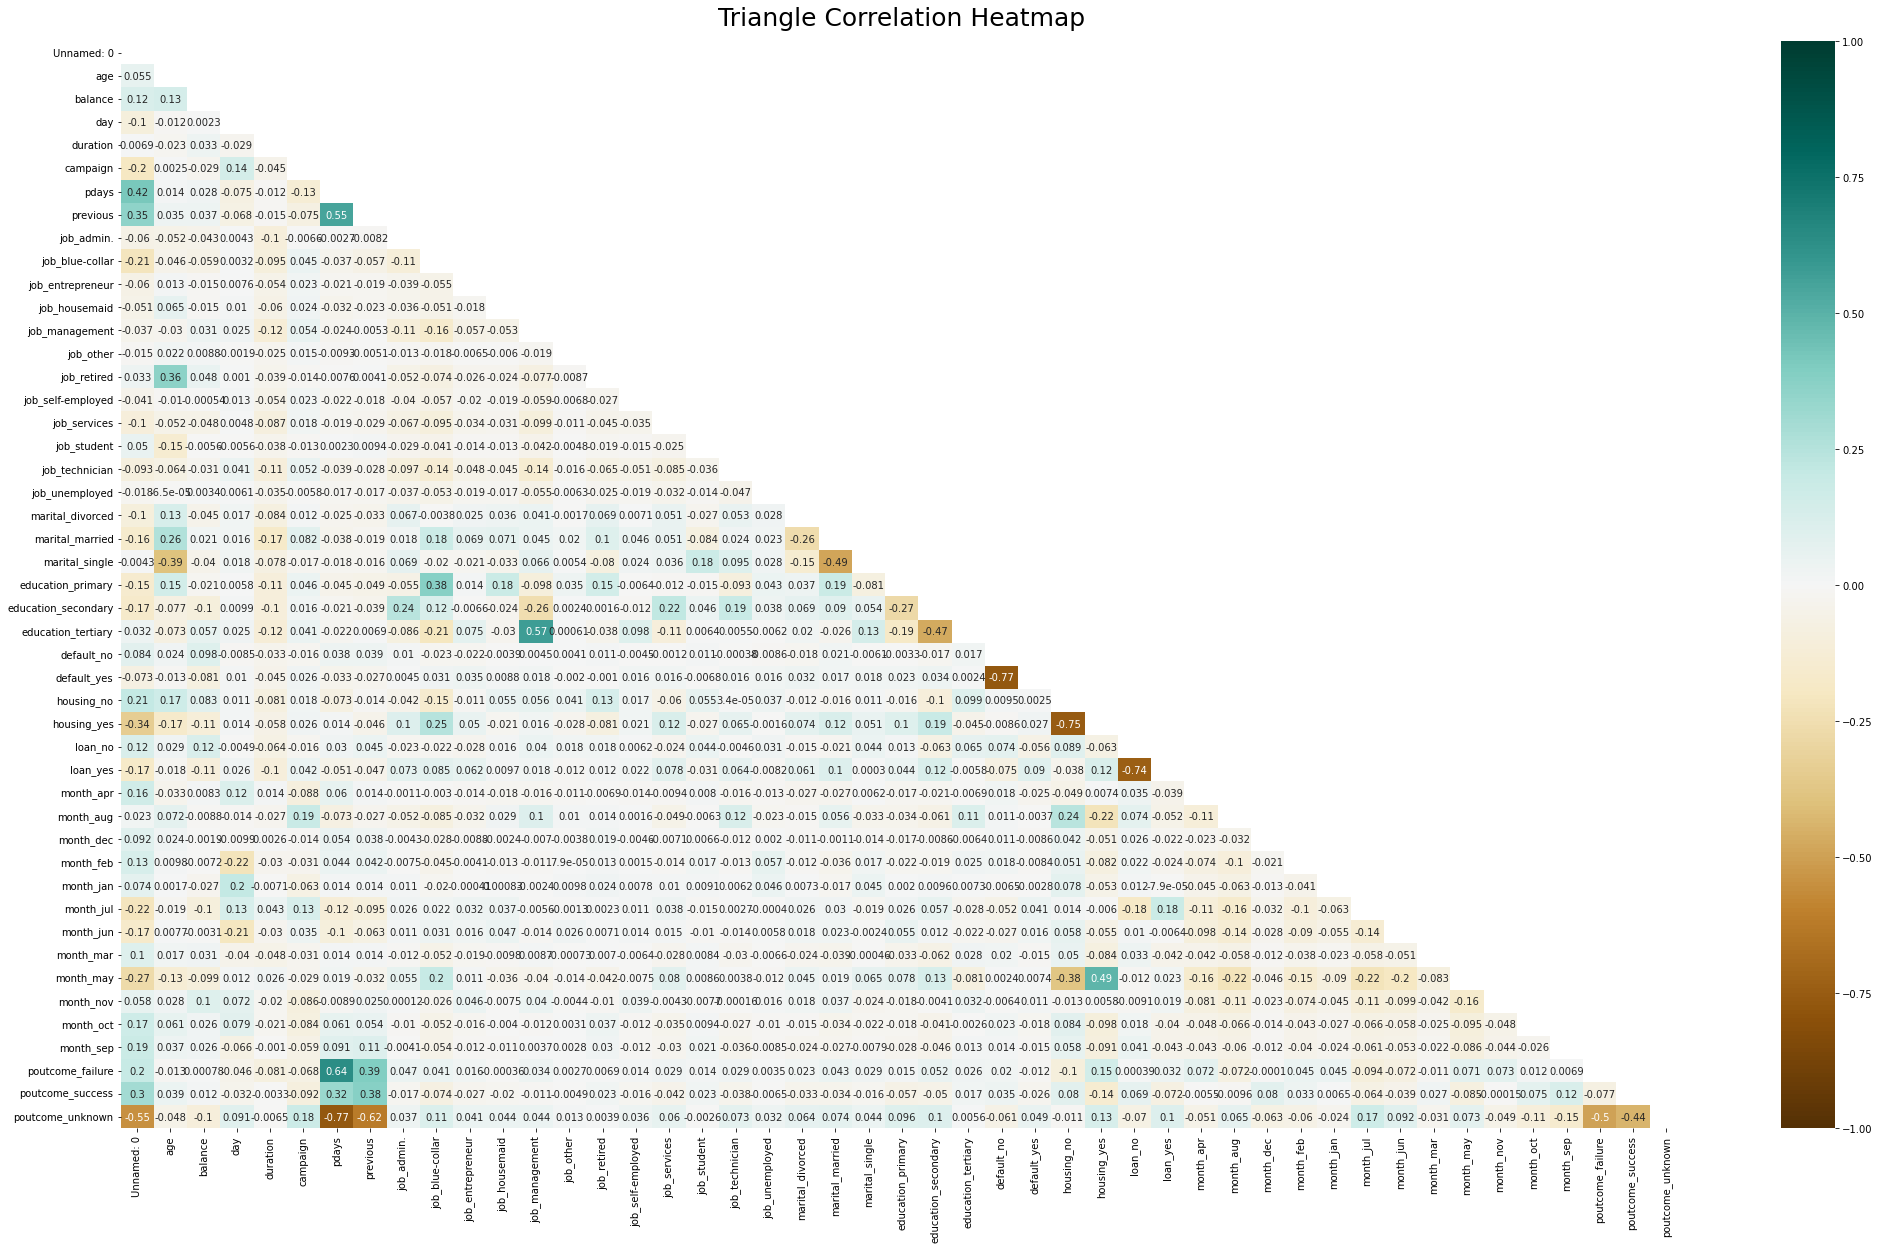

In [23]:
# plotting the heatmap to get correlation between features

plt.figure(figsize=(35, 20))

mask = np.triu(np.ones_like(X_sm.corr(method = 'pearson'), dtype=np.bool))               # build a heamap in a triangle format
heatmap = sns.heatmap(X_sm.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')  # defining a heatmap color and sorrelation coefficients
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':25}, pad=16);

# 7. Scaling

In [24]:
# importing MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

In [25]:
# scaling the dataset
scaler = MaxAbsScaler().fit(X_sm)
scaler = scaler.transform(X_sm)

In [26]:
df_cols = X_sm.columns.tolist()

scaled = pd.DataFrame(scaler, columns = df_cols)
scaled.head()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,0.000000,0.822695,0.205209,0.16129,0.408259,0.166667,-0.001148,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000022,0.624113,0.002777,0.16129,0.236509,0.166667,-0.001148,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000044,0.468085,0.000192,0.16129,0.119193,0.166667,-0.001148,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000111,0.496454,0.022120,0.16129,0.217738,0.166667,-0.001148,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000133,0.397163,0.042804,0.16129,0.339747,0.166667,-0.001148,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# statistical description of the scaled data
scaled.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown
count,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,...,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000,72404.000000
mean,0.589899,0.580084,0.115875,0.494936,0.497415,0.371992,0.048689,0.010876,0.071805,0.134564,...,0.136042,0.106748,0.021228,0.242597,0.075286,0.027305,0.022761,0.079333,0.063601,0.743246
std,0.301622,0.147875,0.169202,0.262055,0.311269,0.240030,0.110636,0.029934,0.258167,0.341260,...,0.342836,0.308795,0.144145,0.428656,0.263854,0.162972,0.149142,0.270259,0.244043,0.436845
min,0.000000,0.255319,-0.655655,0.032258,0.009385,0.166667,-0.001148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333379,0.468085,0.010533,0.258065,0.234632,0.166667,-0.001148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.641045,0.553191,0.049411,0.483871,0.422764,0.333333,-0.001148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.883983,0.680851,0.151968,0.677419,0.777729,0.500000,0.006889,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 8. ML Algorithms

In [28]:
from sklearn.model_selection import cross_val_score      # evaluating models' accuracy

# importing ML models
from sklearn.tree import DecisionTreeClassifier          # importing DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # importing KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier      # importing RandomForestClassifier
from sklearn.svm import LinearSVC                        # importing LinearSVC

# importing metrics
from sklearn.metrics import confusion_matrix             
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# turning off warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
X = scaled.values   # Dependent variables
y = y_sm            # Independent/target variable

In [30]:
# splitting dataset on train/test parts with the train part = 70%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50682, 47), (21722, 47), (50682,), (21722,))

In [31]:
# creating a list where to record models
models = []
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier(criterion='entropy')))
models.append(('Linear SVC', LinearSVC()))

In [32]:
# checking models' perfomance with train_test_split
results = []                                                                  # creating a list called results, where the models' results will be recorded
names = []                                                                    # creating a list called names
for name, model in models:                                                    # running a loop untill all the results will be calculated and recorded
    cv_results = cross_val_score(model, X_train, y_train, scoring='accuracy') # using cross_validation to get models' prediction accuracy
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNeighbors Classifier: 0.934987 (0.001920)
Decision Tree Classifier: 0.922872 (0.000990)
Random Forest Classifier: 0.950653 (0.001664)
Linear SVC: 0.942721 (0.000836)


### Features importances

In [33]:
# calling and fitting RandomForestClassifier 
cls = RandomForestClassifier()
cls.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
importances = cls.feature_importances_

In [35]:
col = scaled.columns
col

Index(['Unnamed: 0', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [36]:
col

Index(['Unnamed: 0', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [37]:
# creating a new dataframe df_import with columns ranked by their importances from the most important one to the less important
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=col)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format 
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

Text(0, 0.5, 'Percentage of importances')

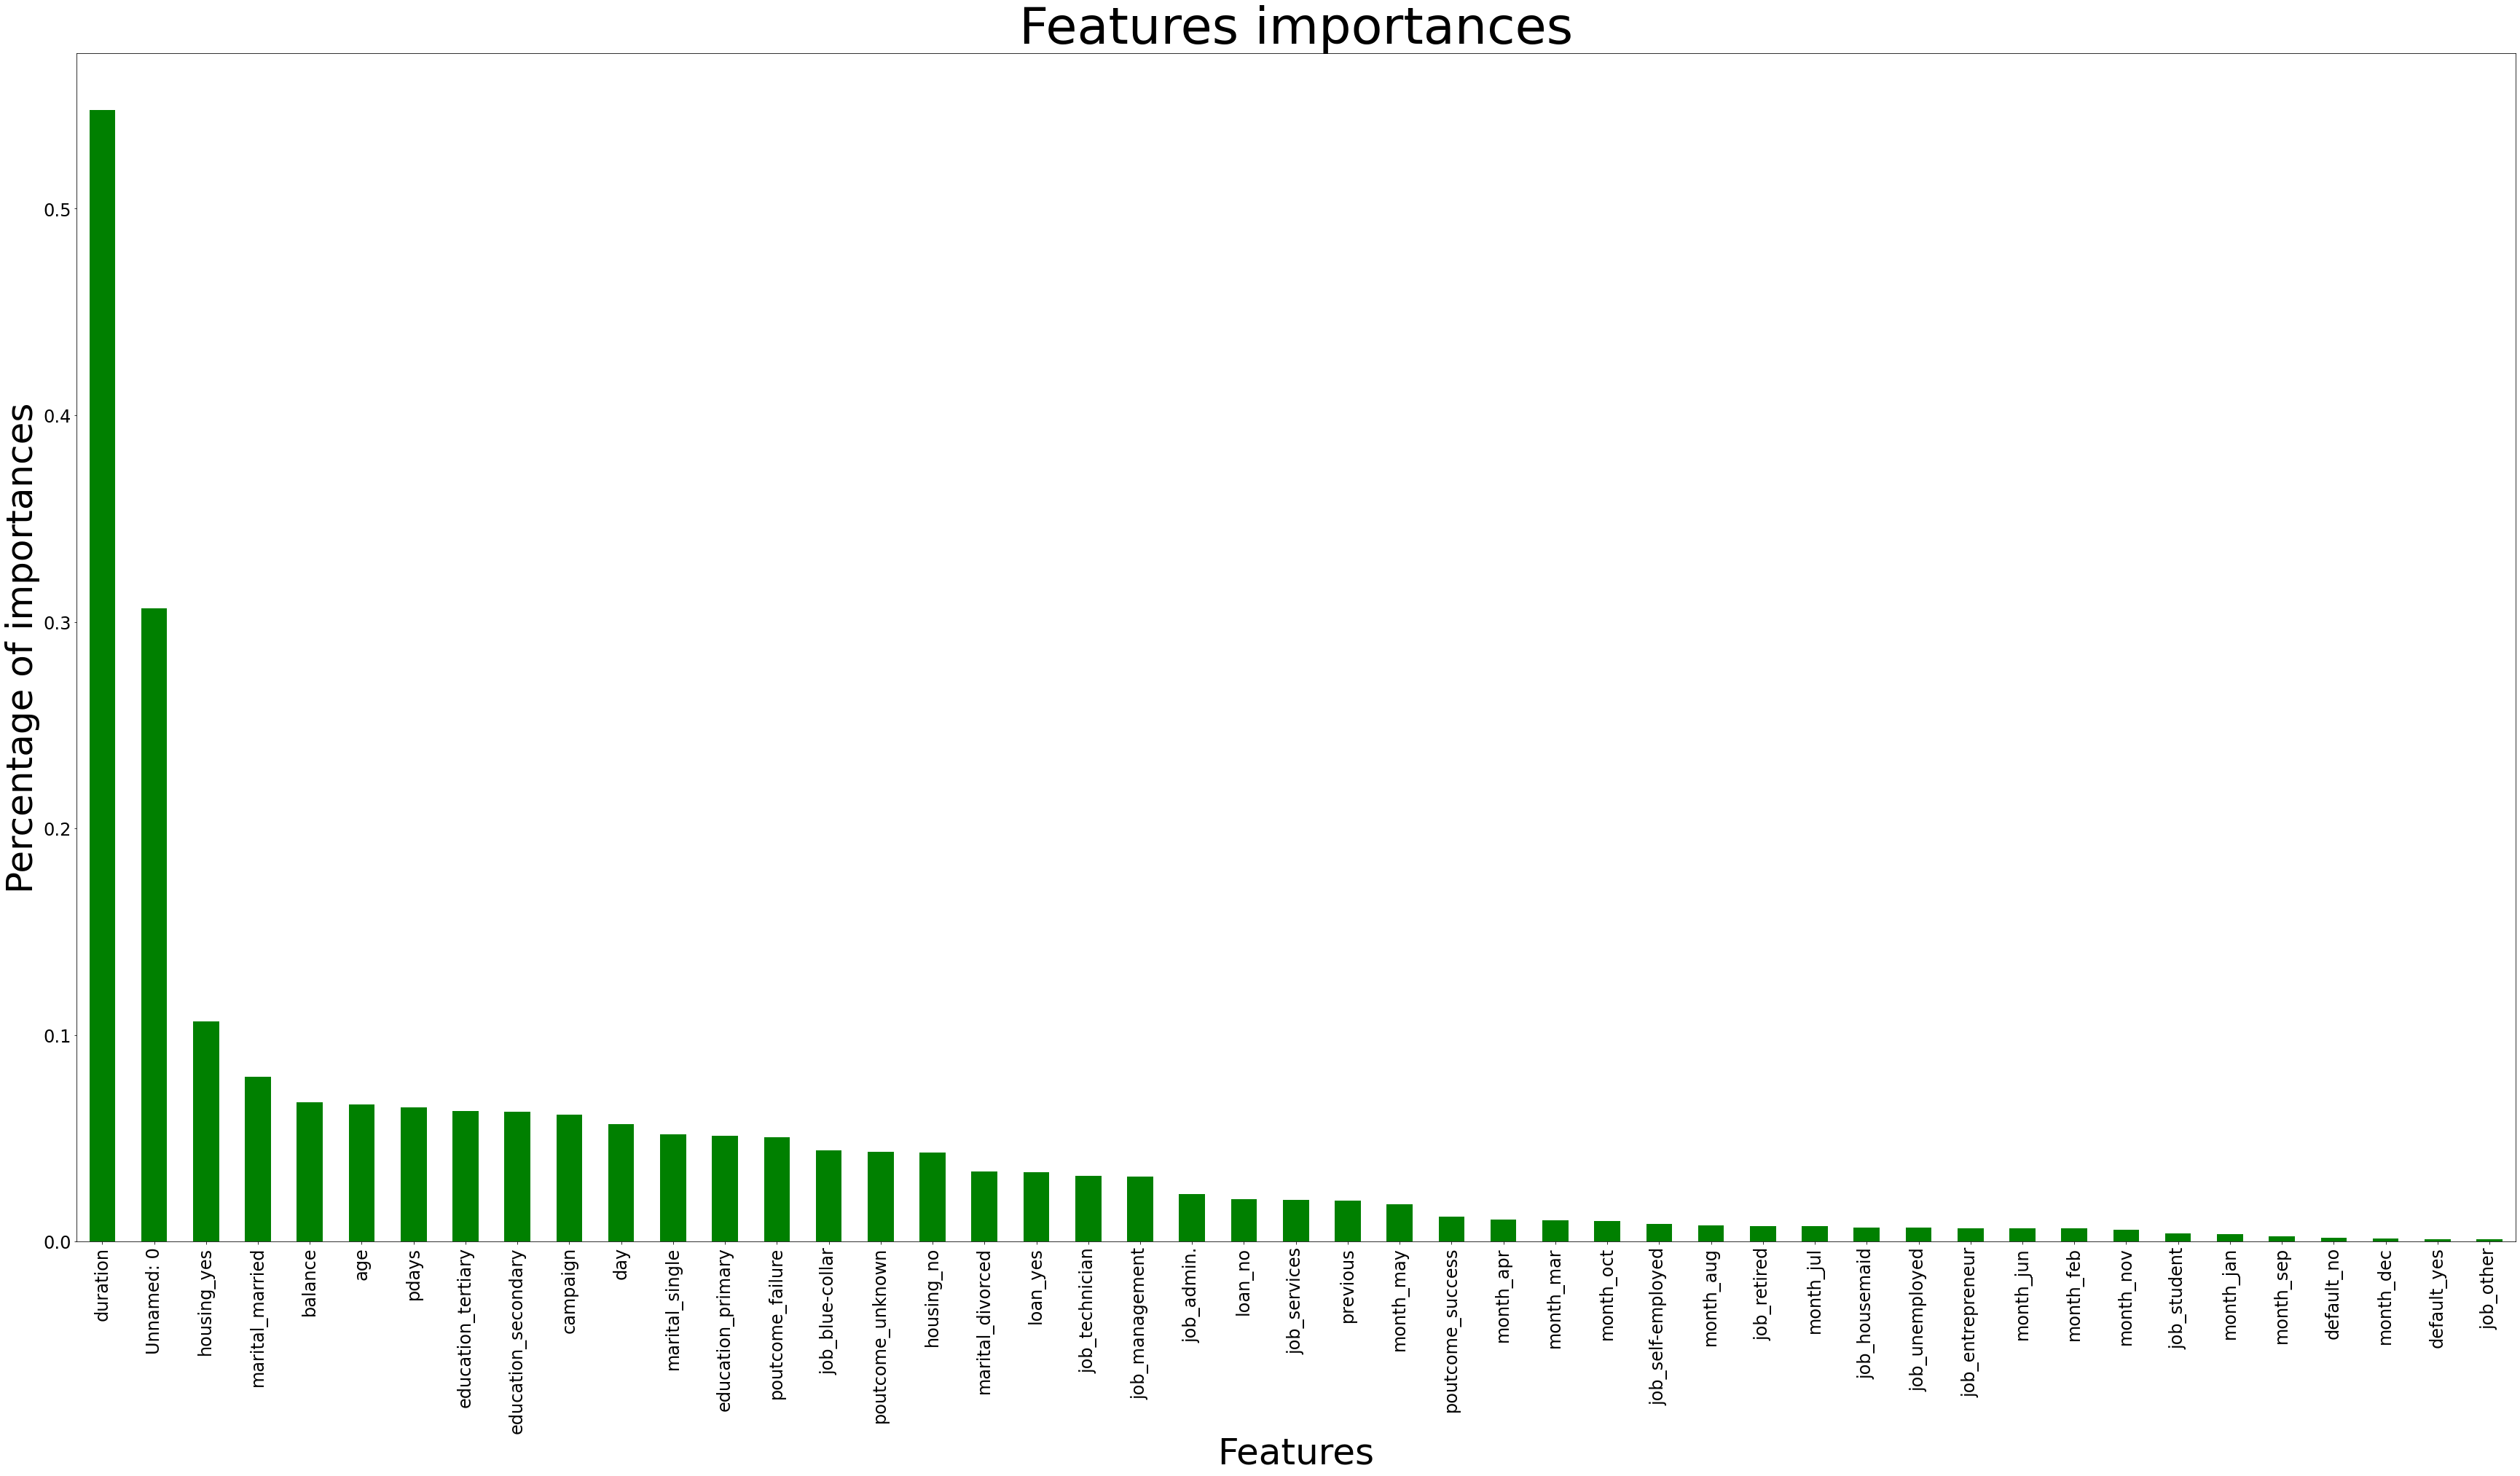

In [38]:
# plotting features importances
g = df_import['Percentage'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'green')
g.set_title('Features importances', fontsize=70)
g.set_xlabel('Features', fontsize=50)
g.set_ylabel('Percentage of importances', fontsize=50)

In [39]:
# creating a new dataframe with the only top-10 important features
df_new = scaled[['duration', 'Unnamed: 0', 'housing_yes', 'marital_married','campaign','education_secondary','balance','pdays','education_primary','age']]

In [40]:
X = df_new.values
y = y_sm 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47062, 10), (25342, 10), (47062,), (25342,))

In [42]:
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNeighbors Classifier: 0.899983 (0.002328)
Decision Tree Classifier: 0.904530 (0.002377)
Random Forest Classifier: 0.932026 (0.001933)
Linear SVC: 0.877162 (0.002282)


### The KNN Model

In [43]:
# training and testing KNN
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [44]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9010733170231237
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     12691
           1       0.88      0.93      0.90     12651

    accuracy                           0.90     25342
   macro avg       0.90      0.90      0.90     25342
weighted avg       0.90      0.90      0.90     25342

[[11010  1681]
 [  826 11825]]


In [45]:
training_accuracy = []                                    # creating an empty list
test_accuracy = []
neighbors_settings = range(1,15)                          # creating the range of neighbors we want to test

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors) # running the model for each number of neighbors defined in the range
    clf.fit(X_train, y_train)                             # fitting the model
    training_accuracy.append(clf.score(X_train, y_train)) # getting training accuracy
    test_accuracy.append(clf.score(X_test, y_test))       # getting testing accuracy

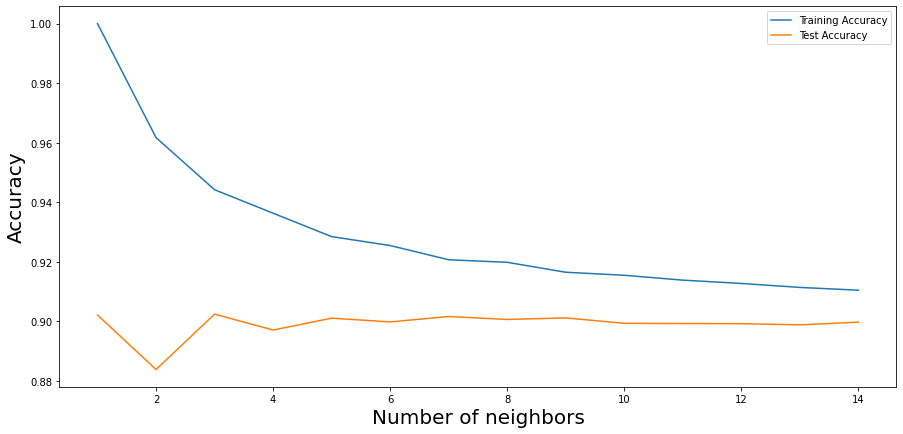

In [46]:
# plotting the graph with results we got above
plt.figure(figsize=(15,7))
plt.plot(neighbors_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'Test Accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend()

In [47]:
# training ans testing the model with 3 neighbors
neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X_train, y_train)
y_pred1 = neighbors.predict(X_test)

In [48]:
print(accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.9024149633020283
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     12691
           1       0.88      0.93      0.90     12651

    accuracy                           0.90     25342
   macro avg       0.90      0.90      0.90     25342
weighted avg       0.90      0.90      0.90     25342

[[11101  1590]
 [  883 11768]]


<AxesSubplot:>

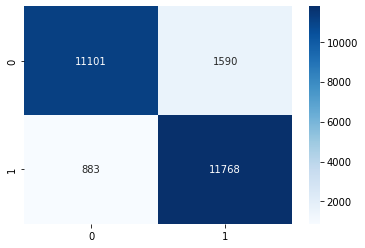

In [49]:
# plotting the heat confusion matrix for visual understanding
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot = True,cmap='Blues', fmt='.5g')

### Random Forest Classifier

In [50]:
# training and testing Random Forest
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [51]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.93560097861258
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     12691
           1       0.92      0.96      0.94     12651

    accuracy                           0.94     25342
   macro avg       0.94      0.94      0.94     25342
weighted avg       0.94      0.94      0.94     25342

[[11607  1084]
 [  548 12103]]


In [52]:
scores =[]                                                          # creating an empty list
for k in range(1, 30):                                             # creating the range of estimators we want to test
    rfc = RandomForestClassifier(n_estimators=k,random_state=42)    # running the model or defined above number of estimators
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

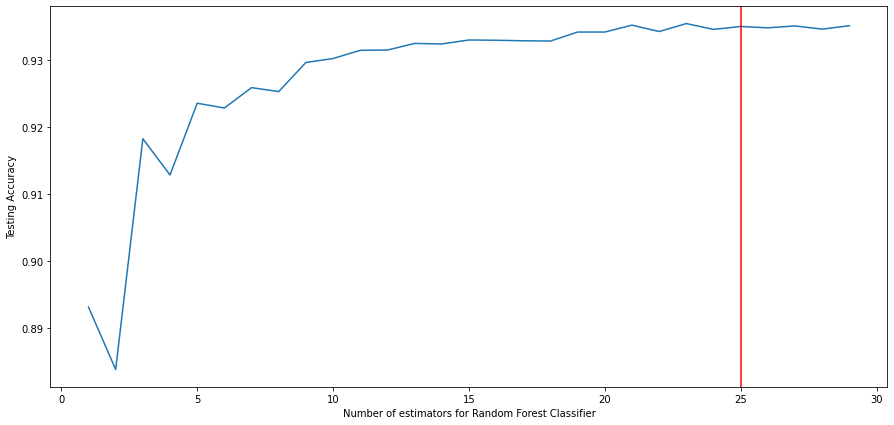

In [53]:
#  plotting the graph dependence of testing accuracy from number of estimators
plt.figure(figsize=(15,7))
plt.plot(range(1, 30), scores)
plt.xlabel('Number of estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.axvline(25, color = 'Red')

In [54]:
#  running the model for number of estimators = 25
forest = RandomForestClassifier(n_estimators=25,random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [55]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.935009075842475
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     12691
           1       0.92      0.96      0.94     12651

    accuracy                           0.94     25342
   macro avg       0.94      0.94      0.93     25342
weighted avg       0.94      0.94      0.93     25342

[[11612  1079]
 [  568 12083]]


<AxesSubplot:>

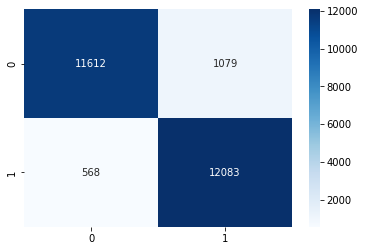

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,cmap='Blues', fmt='.5g')